In [13]:
import numpy as np
import matplotlib.pyplot as plt
import xarray_behave as xb

plt.style.use('ncb.mplstyle')

assemble all data, returns an xarray (see [xarray docs](http://xarray.pydata.org/en/stable/index.html))


Assumes the following folder structure:
```
root
 |--datename
     |--dat 
     |    datename_daq.h5
     |    datename_timestamps.h5  
     |    datename.mp4  
     |--res
          datename_tracks_fixes.h5  
          datename_poses.h5  
          datename_song.mat  
          datename_songmanual.mat  
```    
- root: e.g. `/Volumes/ukme04/#Common/chainingmic`
- datename: `computername-YYYYMMDD_HHMMSS`, e.g. `localhost-20190401_130742`

In [14]:
# CHANGE THESE
datename = 'localhost-20181120_144618'
root = '/Volumes/ukme04/#Data/chainingmic'
dat_path = 'dat.processed'

print(datename)
print(f'   assembling data')
dataset = xb.assemble(datename, root=root, dat_path=dat_path, res_path='res')
dataset

localhost-20181120_144618
   assembling data


/Users/clemens10/Library/CloudStorage/Dropbox/code.py/xarray_behave/src/xarray_behave/loaders.py:139: UserWarning: loadtxt: Empty input file: "/Volumes/ukme04/#Data/chainingmic/res/localhost-20181120_144618/localhost-20181120_144618_idswaps.txt"
  a = np.loadtxt(filepath)  # dtype=np.uintp)


<xarray.Dataset>
Dimensions:              (sampletime: 6180000, channels: 16,
                          no_song_channels: 2, time: 603502, event_types: 7,
                          event_time: 2, index: 4848, bodyparts: 3, coords: 2,
                          flies: 2, poseparts: 12)
Coordinates:
  * sampletime           (sampletime) float64 0.0 9.99e-05 ... 618.0 618.0
  * time                 (time) float64 0.0 0.0009997 0.001999 ... 603.5 603.5
  * event_types          (event_types) <U21 'song_pulse_any_fss' ... 'vibrati...
    event_categories     (event_types) <U7 'event' 'event' ... 'segment' 'event'
  * event_time           (event_time) <U13 'start_seconds' 'stop_seconds'
  * bodyparts            (bodyparts) <U6 'head' 'center' 'tail'
  * coords               (coords) <U1 'y' 'x'
  * flies                (flies) int64 0 1
    chambers             (flies) int64 0 0
    nearest_frame        (time) int64 622 623 623 623 ... 60930 60930 60930
  * poseparts            (poseparts) <U16 'head' 'neck' ... 'right_wing' 'tail'
Dimensions without coordinates: channels, no_song_channels, index
Data variables:
    song_raw             (sampletime, channels) float64 1.89 1.705 ... 1.891
    non_song_raw         (sampletime, no_song_channels) float64 -0.0001906 .....
    song_events          (time, event_types) int16 0 0 0 0 0 0 0 ... 1 1 0 0 0 0
    event_times          (index, event_time) float64 1.104 1.104 ... nan 0.0
    event_names          (index) <U128 'song_pulse_any_fss' ... 'sine_fss'
    body_positions       (time, flies, bodyparts, coords) float64 840.5 ... 3...
    pose_positions       (time, flies, poseparts, coords) float64 -25.55 ... ...
    pose_positions_allo  (time, flies, poseparts, coords) float64 834.5 ... 3...
Attributes:
    video_filename:           /Volumes/ukme04/#Data/chainingmic/dat.processed...
    datename:                 localhost-20181120_144618
    root:                     /Volumes/ukme04/#Data/chainingmic
    dat_path:                 dat.processed
    res_path:                 res
    sampling_rate_Hz:         10000.0
    target_sampling_rate_Hz:  1000
    ref_time:                 1542721585.5441856
    swap_events:              []

Saving to {datename  + ".zarr"}: `xb.save(datename  + '.zarr', dataset)`

Loading from {datename  + ".zarr"}: `dataset = xb.load(datename + '.zarr')`

While one big advantage of xarrays is fancy/semantic indexing (for instance by time), access to the underlying raw data is also simple:

In [15]:
# use attribute-like (dot-notation) or dict-like notation to access individual variables in the data set - this will return DataArrays
print('song_labels as xarray (attribute-like access):\n', dataset.song_events)
print('song_labels as xarray (dict-like access):\n', dataset['song_events'])

# if you want the underlying raw numpy array, simply append the above by `.data`
print('ACCESS RAW DATA:')
print('song_labels as numpy array (attribute-like access):', dataset.song_events.values)
print('song_labels as numpy array (dict-like access):', dataset['song_events'].values)

song_labels as xarray (attribute-like access):
 <xarray.DataArray 'song_events' (time: 603502, event_types: 7)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int16)
Coordinates:
  * time              (time) float64 0.0 0.0009997 0.001999 ... 603.5 603.5
  * event_types       (event_types) <U21 'song_pulse_any_fss' ... 'vibration_...
    event_categories  (event_types) <U7 'event' 'event' ... 'segment' 'event'
    nearest_frame     (time) int64 622 623 623 623 ... 60930 60930 60930 60930
Attributes:
    description:       Event times as boolean arrays.
    sampling_rate_Hz:  1000.0
    time_units:        seconds
    event_times:       {'song_pulse_any_fss': array([[  1.10364008,   1.10364...
song_labels as xarray (dict-like access):
 <xarray.DataArray 'song_events' (time: 603502, event_types: 7)>
array([[0, 0, 0, ..., 0, 0, 

We can address all the different data types - the raw song recording, the song annotations, and the tracked data using time units without having to worry about the different sampling rates.

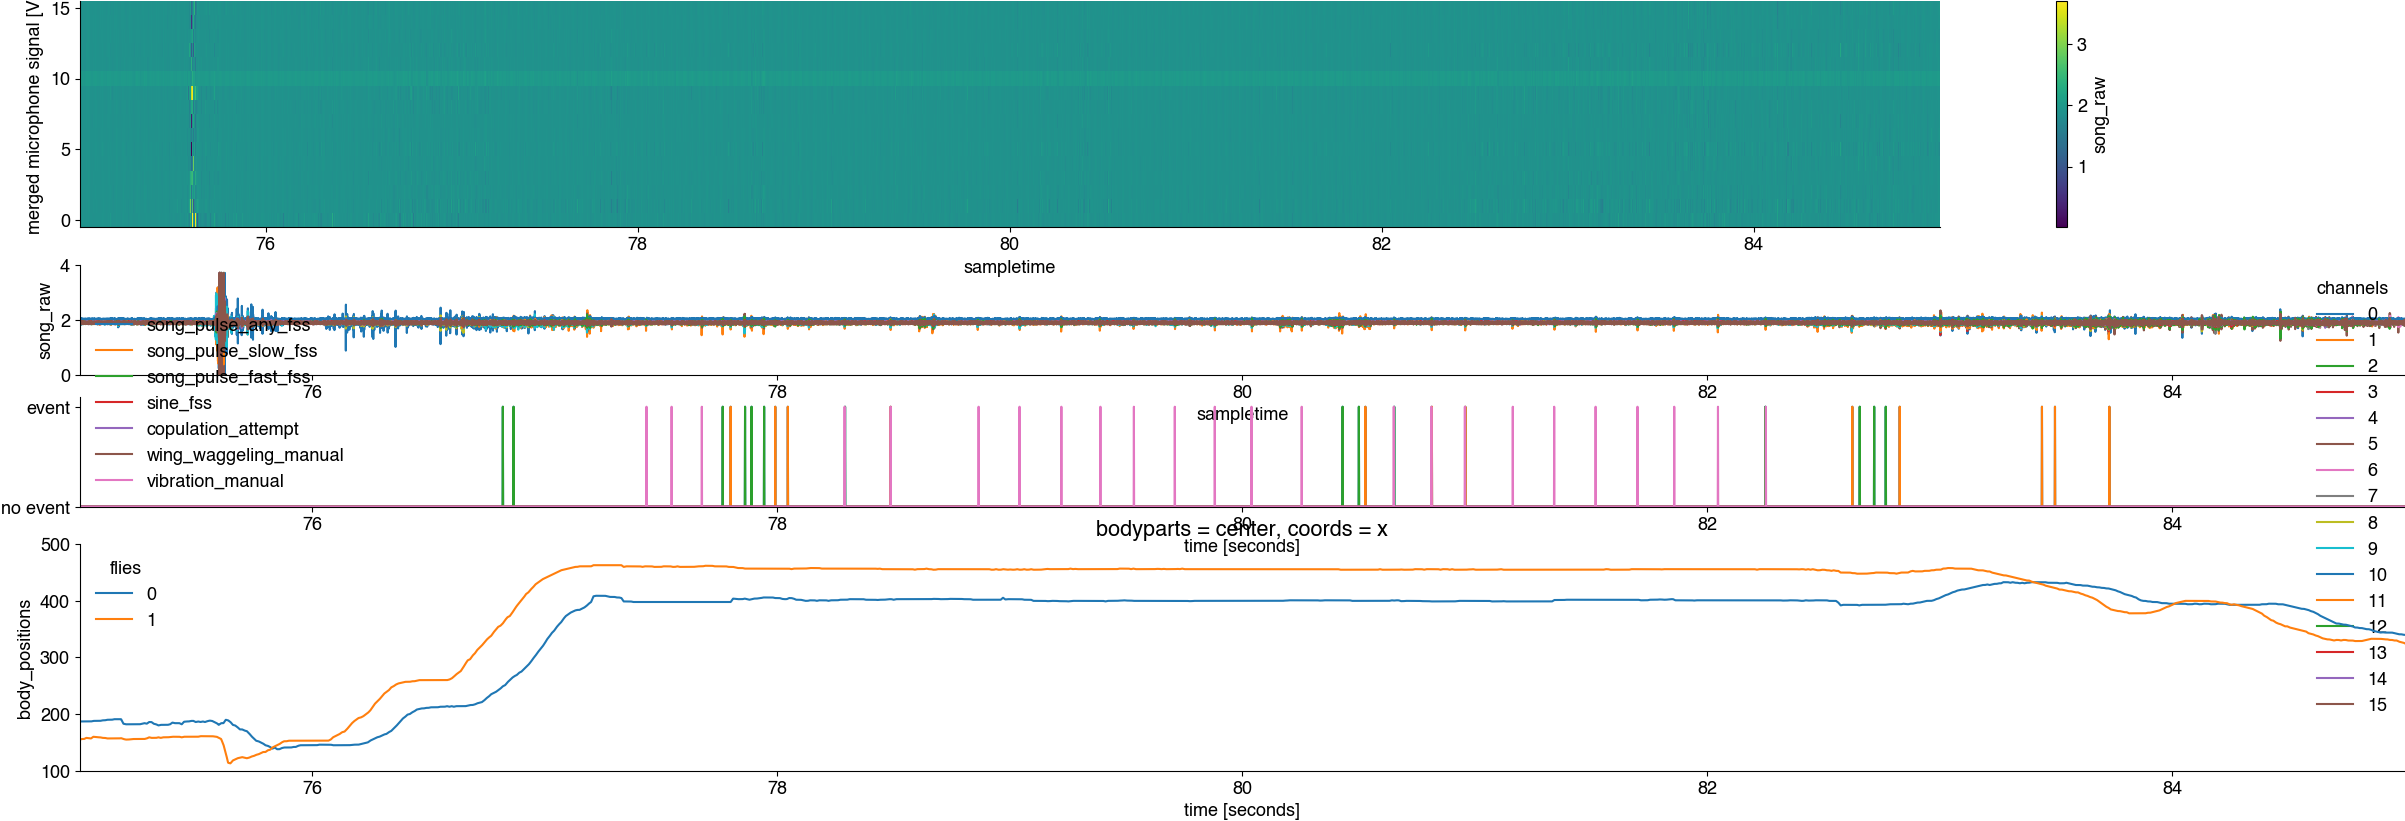

In [16]:
t0 = 75  # seconds
t1 = t0+10  # seconds

plt.gcf().set_size_inches(30, 10)
plt.subplot(311)
dataset.song_raw.sel(sampletime=slice(t0, t1)).T.plot()  # using the .sel syntax with `slice`
plt.ylabel('merged microphone signal [V]')

plt.subplot(613)
dataset.song_raw.sel(sampletime=slice(t0, t1)).T.plot(x='sampletime', hue='channels')
# plt.yticks([0, 1, 2], labels=['no song','pulse','sine'])
plt.xlim(t0, t1)

plt.subplot(614)
ds = dataset.song_events.sel(time=slice(t0, t1))
plt.plot(ds.time, ds.values)
plt.legend(ds.event_types.values)
plt.ylim(0, 1.1)
plt.yticks([0, 1], labels=['no event','event'])
plt.xlabel('time [seconds]')
plt.xlim(t0, t1)

plt.subplot(313)
dataset.body_positions.sel(time=slice(t0, t1), bodyparts='center', coords='x').T.plot(x='time', hue='flies')
plt.xlabel('time [seconds]')
plt.xlim(t0, t1)

plt.show()

<xarray.DataArray 'song_raw' (sampletime: 99993, channels: 16)>
array([[1.87899757, 1.8546566 , 1.86320883, ..., 1.88228689, 1.87735291,
        1.89478631],
       [1.82702631, 1.87702398, 1.8556434 , ..., 1.87340573, 1.87603718,
        1.89445738],
       [1.85070941, 1.89708884, 1.86616922, ..., 1.88689194, 1.8793265 ,
        1.90037816],
       ...,
       [1.91156185, 1.90136495, 1.92833738, ..., 1.83853893, 1.89018126,
        1.91189078],
       [1.87044534, 1.87439252, 1.91353544, ..., 1.83886786, 1.8977467 ,
        1.87768184],
       [1.80794825, 1.8464333 , 1.89215486, ..., 1.87209   , 1.91156185,
        1.89610204]])
Coordinates:
  * sampletime  (sampletime) float64 75.0 75.0 75.0 75.0 ... 85.0 85.0 85.0 85.0
Dimensions without coordinates: channels
Attributes:
    description:       Raw song recording (multi channel).
    sampling_rate_Hz:  10000.0
    time_units:        seconds
    amplitude_units:   volts
<xarray.DataArray 'song_events' (time: 9999, event_types: 7)>


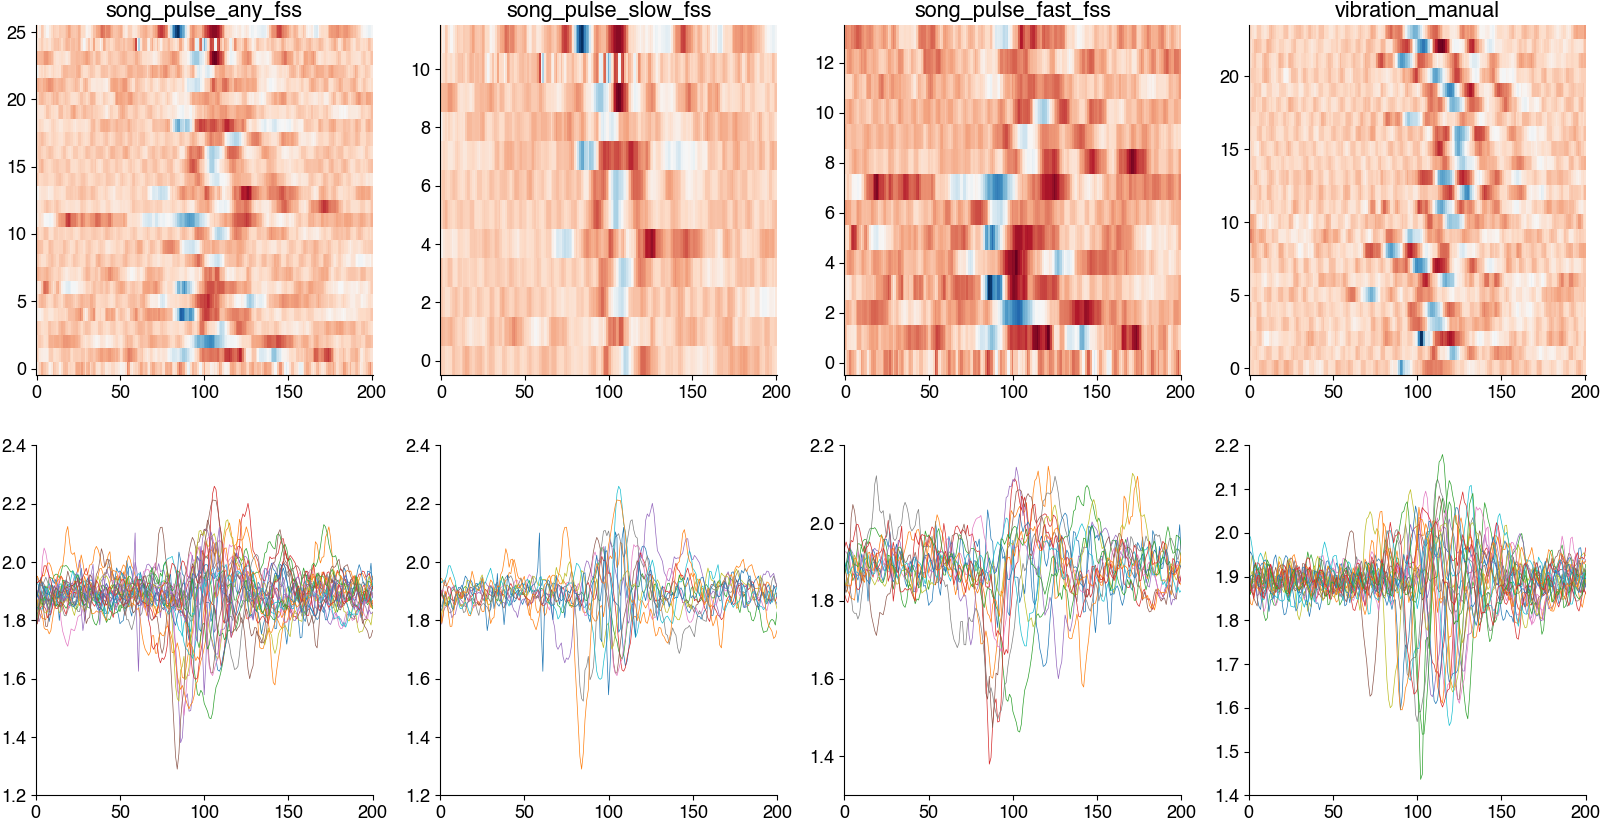

In [19]:
song = dataset.song_raw.sel(sampletime=slice(t0, t1))
print(song)
ds = dataset.song_events.sel(time=slice(t0, t1))
print(ds)
indices, types = np.where(ds.values)
times = ds.time[indices]

waveforms = np.zeros((len(indices), 201))
for cnt, tim in enumerate(times):
    tmp = song.sel(sampletime=slice(tim-0.011, tim+0.011)).values
    loudest_channel = np.argmax(np.var(np.abs(tmp), axis=0))
    waveforms[cnt,: ] = tmp[:201, loudest_channel]

plt.gcf().set_size_inches(20, 10)
for cnt, typ in enumerate(np.unique(types)):
    plt.subplot(2,4, 1+cnt)
    plt.imshow(waveforms[types==typ,:], cmap='RdBu_r');
    plt.title(ds.event_types[typ].values)
    plt.subplot(2,4, 4+1+cnt)
    plt.plot(waveforms[types==typ,:].T, linewidth=0.5);
    

<xarray.DataArray 'nearest_frame' ()>
array(3620)
Coordinates:
    time           float64 30.0
    nearest_frame  int64 3620
<xarray.DataArray 'pose_positions_allo' (coords: 2)>
array([756, 266], dtype=uint64)
Coordinates:
    time           float64 30.0
  * coords         (coords) <U1 'y' 'x'
    flies          int64 0
    chambers       int64 0
    nearest_frame  int64 3620
    poseparts      <U16 'thorax'
Attributes:
    description:       coords are "allocentric" - rel. to frame
    type:              poses
    spatial_units:     pixels
    pixel_size_mm:     nan
    loader:            leap
    kind:              poses
    path:              /Volumes/ukme04/#Data/chainingmic/res/localhost-201811...
    skeleton:          []
    video_fps:         99.73140574472133
    sampling_rate_Hz:  1000.0
    time_units:        seconds
    poses_from:        leap


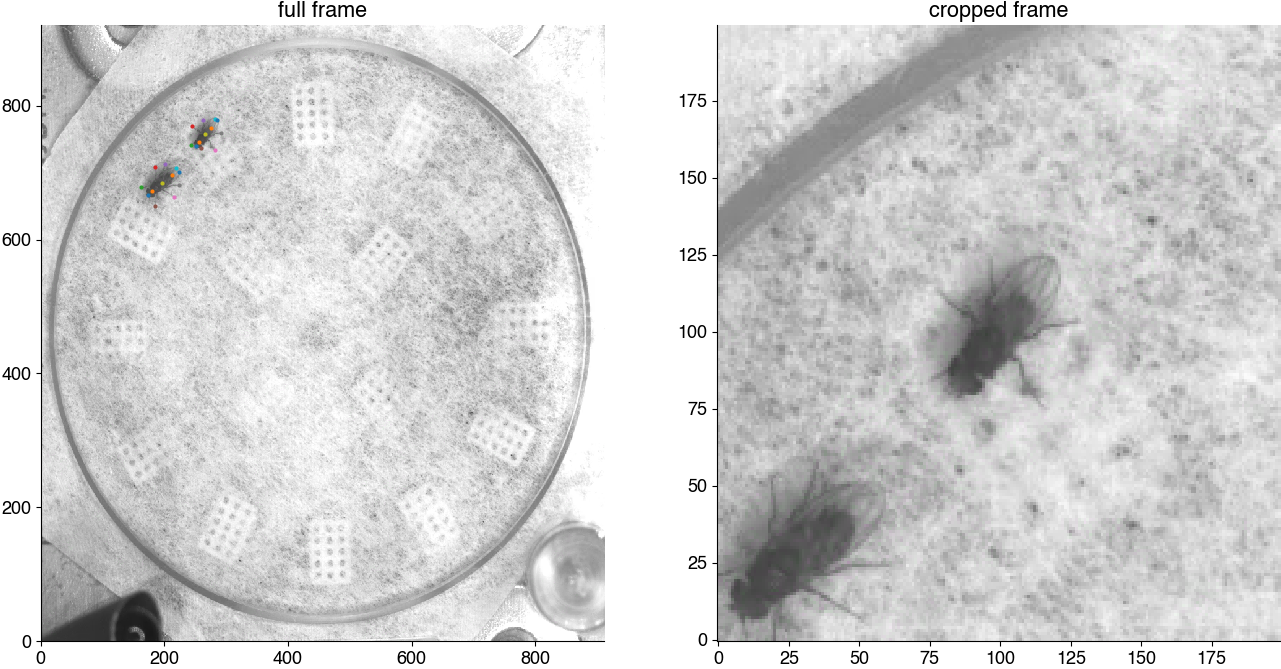

In [30]:
from videoreader import VideoReader
filepath = f"{root}/dat.processed/{datename}/{datename}.mp4"
vr = VideoReader(filepath)

time = 30.0 #seconds
frame_number = dataset.nearest_frame.sel(time=time, method='nearest')  # get frame number for that idx
print(frame_number)
frame = vr[int(frame_number)]

plt.gcf().set_size_inches(16, 8)
plt.subplot(121)
plt.imshow(frame, cmap='Greys')
plt.plot(dataset.pose_positions_allo.sel(time=time, method='nearest').sel(coords='x'), dataset.pose_positions_allo.sel(time=time, method='nearest').sel(coords='y'), '.')
plt.xlim(0, frame.shape[1])
plt.ylim(0, frame.shape[0])
plt.title('full frame')
# plt.axis('square')
# plt.axis('off')


plt.subplot(122)
fly = 0
fly_pos = dataset.pose_positions_allo.sel(time=time, method='nearest').loc[..., fly, 'thorax',:].astype(np.uintp)
print(fly_pos)
box_size = np.uintp(100)

x_range = np.clip((fly_pos.loc['y']-box_size, fly_pos.loc['y']+box_size), 0, vr.frame_width-1)
y_range = np.clip((fly_pos.loc['x']-box_size, fly_pos.loc['x']+box_size), 0, vr.frame_height-1)

plt.imshow(frame[slice(*x_range), slice(*y_range), :], cmap='Greys')
plt.title('cropped frame');


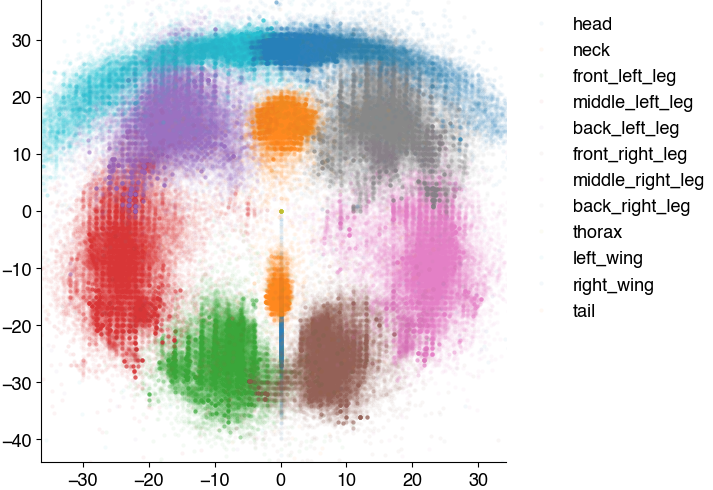

In [22]:
plt.gcf().set_size_inches(6, 6)
plt.plot(dataset.pose_positions[::10,0, :,1], dataset.pose_positions[::10,0, :,0], '.', alpha=0.05)

plt.xlim(*np.nanpercentile(dataset.pose_positions[...,1], (0.1, 99.9)))
plt.ylim(*np.nanpercentile(dataset.pose_positions[...,0], (0.1, 99.9)))

leg = plt.legend(dataset.poseparts.values, loc="upper left", bbox_to_anchor=(1,1))


In [23]:
times = [100.1, 200.1]
frames = dataset.nearest_frame.sel(time=times, method='nearest')
print(f'frames for times {times}:\n {frames}') # get frame for time
idx = [np.where(dataset.nearest_frame==frame)[0][0] for frame in frames]
print(f'indices for times {times}:\n {idx}') # get frame for time

frames = [9000, 10000]
times = [dataset.time[dataset.nearest_frame==frame][0].values for frame in frames]
print(f'times for frames {frames}:\n {times}') # get frame for time
idx = [np.where(dataset.nearest_frame==frame)[0][0] for frame in frames]
print(f'times for frames {frames}:\n {idx}') # get frame for time


frames for times [100.1, 200.1]:
 <xarray.DataArray 'nearest_frame' (time: 2)>
array([10625, 20618])
Coordinates:
  * time           (time) float64 100.1 200.1
    nearest_frame  (time) int64 10625 20618
indices for times [100.1, 200.1]:
 [100092, 200092]
times for frames [9000, 10000]:
 [array(83.82963991), array(93.8373611)]
times for frames [9000, 10000]:
 [83830, 93837]


In [24]:
pulse_time = 10.12  # seconds

# get nearest sample time for pulse_time
sampletime = dataset.sampletime.sel(sampletime=pulse_time, method='nearest')
print(f'nearest value in `sampletime` for {pulse_time} seconds:\n {sampletime}')
# now get index into song_raw for pulse_time
idx = np.where(dataset.sampletime==sampletime)
print(f'index for nearest value:\n {idx}')

# get nearest time for pulse_time
time = dataset.time.sel(time=pulse_time, method='nearest')
print(f'nearest value in `time` for {pulse_time} seconds:\n {time}')
# get index into poses for time
idx = np.where(dataset.time==time)
print(f'index for nearest value:\n {idx}')

# get frame for pulse_time
frame = dataset.nearest_frame.sel(time=pulse_time, method='nearest')
print(f'nearest frame for {pulse_time} seconds:\n {frame}')



nearest value in `sampletime` for 10.12 seconds:
 <xarray.DataArray 'sampletime' ()>
array(10.1199832)
Coordinates:
    sampletime  float64 10.12
index for nearest value:
 (array([101203]),)
nearest value in `time` for 10.12 seconds:
 <xarray.DataArray 'time' ()>
array(10.11968327)
Coordinates:
    time           float64 10.12
    nearest_frame  int64 1634
index for nearest value:
 (array([10120]),)
nearest frame for 10.12 seconds:
 <xarray.DataArray 'nearest_frame' ()>
array(1634)
Coordinates:
    time           float64 10.12
    nearest_frame  int64 1634
